# Cognifyz Data Analysis Internship – Level 2

This level focuses on advanced analysis of restaurant ratings, cuisine combinations, geographic distribution, and restaurant chains. The objective is to extract deeper insights related to customer preferences, restaurant popularity, and spatial patterns.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/dataset.csv', encoding='latin-1')

# Data cleaning (same logic as Level-1)
df = df.dropna(subset=['Cuisines'])
df = df.reset_index(drop=True)

# Level-2 : Task-1 — Restaurant Ratings

In [15]:
rating_dist = df['Aggregate rating'].value_counts().sort_index()
rating_dist

0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: Aggregate rating, dtype: int64

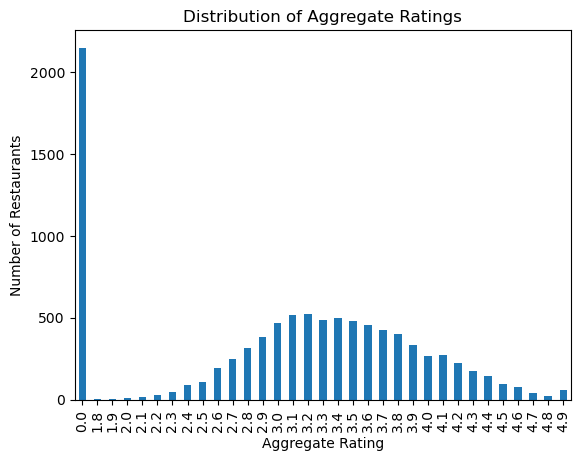

In [16]:
rating_dist.plot(kind='bar')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()

In [17]:
rating_dist.idxmax()

0.0

In [18]:
df['Votes'].mean()

156.7720603647034

Result: The distribution of aggregate ratings shows that a large number of restaurants have a rating of 0.0, which indicates either unrated restaurants or restaurants with no customer feedback. Apart from this, most restaurants are rated between 3.0 and 4.0, suggesting that average to good ratings are common across the dataset. The most frequently occurring rating is 0.0, making it the most common rating value. The average number of votes per restaurant is around 157, which indicates a moderate level of customer participation in rating restaurants. Overall, the dataset contains a mix of unrated restaurants and moderately well-rated ones.

# Level-2 : Task-2 — Cuisine Combination

In [19]:
cuisine_combo_counts = df['Cuisines'].value_counts()
cuisine_combo_counts.head(5)

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

In [20]:
cuisine_combo_rating = df.groupby('Cuisines')['Aggregate rating'].mean()
cuisine_combo_rating.sort_values(ascending=False).head(5)

Cuisines
Italian, Deli              4.9
Hawaiian, Seafood          4.9
American, Sandwich, Tea    4.9
Continental, Indian        4.9
European, Asian, Indian    4.9
Name: Aggregate rating, dtype: float64

Result: The cuisine combination analysis shows that North Indian cuisine, both alone and in combination with Chinese, appears most frequently in the dataset. This indicates that these combinations are widely offered by restaurants and are popular among customers. When comparing average ratings, some less common cuisine combinations such as Italian and Deli or Hawaiian and Seafood show very high average ratings. This suggests that while these combinations are not very common, they tend to receive better customer ratings, possibly due to niche preferences or higher-quality offerings.

# Level-2 : Task-3 — Geographic Analysis

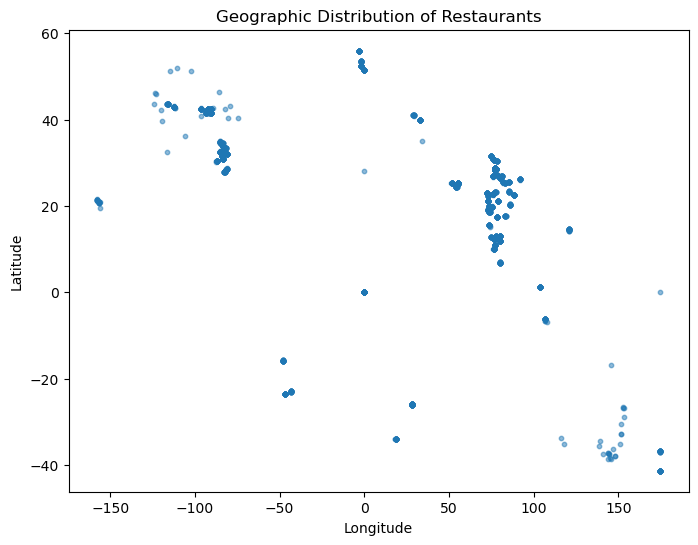

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Restaurants')
plt.show()

Result: The geographic plot shows that restaurants are not evenly distributed across locations. Instead, they are highly concentrated in specific areas, which likely represent major cities or urban regions. These dense clusters indicate regions with a higher number of restaurants, while other areas have fewer or scattered points. This pattern suggests that restaurants are mainly located in populated and commercially active locations rather than rural areas.

# Level-2 : Task-4 — Restaurant Chains

In [22]:
restaurant_counts = df['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1]
chains.head()

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

In [23]:
chain_analysis = df[df['Restaurant Name'].isin(chains.index)]

chain_summary = chain_analysis.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'mean'
}).sort_values(by='Aggregate rating', ascending=False)

chain_summary.head()


,Aggregate rating,Votes
Restaurant Name,,
Talaga Sampireun,4.900,1838.0
Silantro Fil-Mex,4.850,682.0
AB's Absolute Barbecues,4.850,1575.5
AB's - Absolute Barbecues,4.825,3350.0
Naturals Ice Cream,4.800,1547.0


Result: The analysis shows that several restaurant chains are present in the dataset, identified by restaurant names appearing multiple times. Popular chains such as Cafe Coffee Day, Domino’s Pizza, and Subway have a high number of outlets, indicating strong market presence. When comparing ratings and average votes, some restaurant chains like Talaga Sampireun and AB’s Absolute Barbecues stand out with very high average ratings and a large number of votes. This suggests that well-established restaurant chains tend to attract more customers and generally receive better ratings, reflecting higher popularity and customer trust.